# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

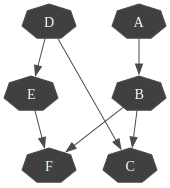

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.797395 , 0.202605] , [0.797393 , 0.202607]]

B:Range([0,1])
<A:0> : [[0.183376 , 0.816624] , [0.141279 , 0.858721]]
<A:1> : [[0.444891 , 0.555109] , [0.444682 , 0.555318]]

C:Range([0,1])
<B:0|D:0> : [[0.554137 , 0.445863] , [0.554098 , 0.445902]]
<B:1|D:0> : [[0.506889 , 0.493111] , [0.506809 , 0.493191]]
<B:0|D:1> : [[0.478936 , 0.521064] , [0.478814 , 0.521186]]
<B:1|D:1> : [[0.460647 , 0.539353] , [0.460485 , 0.539515]]

D:Range([0,1])
<> : [[0.879097 , 0.120903]]

E:Range([0,1])
<D:0> : [[0.555688 , 0.444312] , [0.555649 , 0.444351]]
<D:1> : [[0.381194 , 0.618806] , [0.380601 , 0.619399]]

F:Range([0,1])
<E:0|B:0> : [[0.47743 , 0.52257] , [0.477305 , 0.522695]]
<E:1|B:0> : [[0.199671 , 0.800329] , [0.0894139 , 0.910586]]
<E:0|B:1> : [[0.72889 , 0.27111] , [0.728887 , 0.271113]]
<E:1|B:1> : [[0.278168 , 0.721832] , [0.274482 , 0.725518]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [8]:
for eps in [1,1e-1,1e-2,1e-3,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()